<a href="https://colab.research.google.com/github/LazyHooks/AI_Jobs_Disruption/blob/main/MM_aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warning override

In [37]:
import warnings

warnings.filterwarnings('ignore')

input

In [38]:
df = pd.read_csv("MM_aug.csv")

exploratory

In [39]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Knowledge        717 non-null    int64
 1   Problem Solving  717 non-null    int64
 2   Interaction      717 non-null    int64
 3   Impact           717 non-null    int64
 4   Accountability   717 non-null    int64
dtypes: int64(5)
memory usage: 28.1 KB


In [40]:
df.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,181,48,52,90,0
1,75,48,27,64,0
2,148,48,84,64,0
3,52,36,27,90,0
4,52,36,27,90,0


checks

In [41]:
df.isnull().sum()
df.describe()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
count,717.000000,717.000000,717.000000,717.000000,717.000000
mean,140.451883,54.937238,56.771269,119.507671,30.913529
std,59.120646,17.183294,23.367016,34.336391,17.380021
min,52.000000,36.000000,27.000000,55.000000,0.000000
25%,75.000000,48.000000,36.000000,90.000000,21.000000
50%,148.000000,48.000000,66.000000,116.000000,35.000000
75%,181.000000,65.000000,84.000000,142.000000,42.000000
max,300.000000,117.000000,125.000000,242.000000,75.000000


In [42]:
X=df

Scaling

In [43]:
cols = X.columns

In [44]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [45]:
X = pd.DataFrame(X, columns=[cols])

In [46]:
X.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.520161,0.148148,0.255102,0.187166,0.0
1,0.092742,0.148148,0.000000,0.048128,0.0
2,0.387097,0.148148,0.581633,0.048128,0.0
3,0.000000,0.000000,0.000000,0.187166,0.0
4,0.000000,0.000000,0.000000,0.187166,0.0


In [47]:
X.dropna(inplace=True)
X

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.520161,0.148148,0.255102,0.187166,0.000000
1,0.092742,0.148148,0.000000,0.048128,0.000000
2,0.387097,0.148148,0.581633,0.048128,0.000000
3,0.000000,0.000000,0.000000,0.187166,0.000000
4,0.000000,0.000000,0.000000,0.187166,0.000000
...,...,...,...,...,...
712,0.673387,0.629630,0.224490,0.609626,0.333333
713,0.681452,0.148148,0.397959,0.540107,0.800000
714,0.681452,0.148148,0.397959,0.540107,0.800000
715,0.681452,0.358025,0.397959,1.000000,0.466667


K means

In [48]:
# 2 cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

centers

In [49]:
kmeans.cluster_centers_

array([[0.5483236 , 0.22646706, 0.49983931, 0.3644364 , 0.42166229],
       [0.13932892, 0.24210024, 0.08148081, 0.32287688, 0.40142857]])

inertia

In [50]:
kmeans.inertia_

114.6679694673963

Elbow

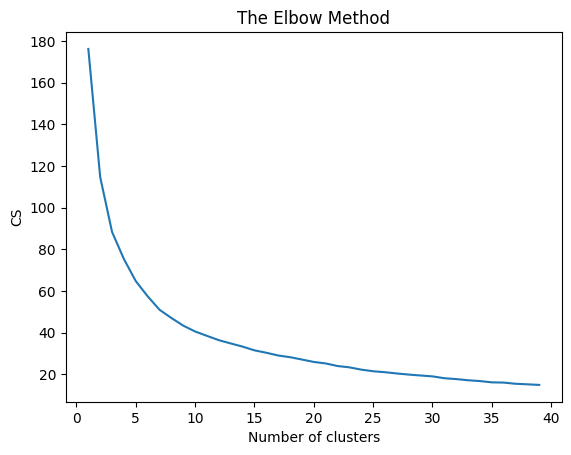

In [51]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 40), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

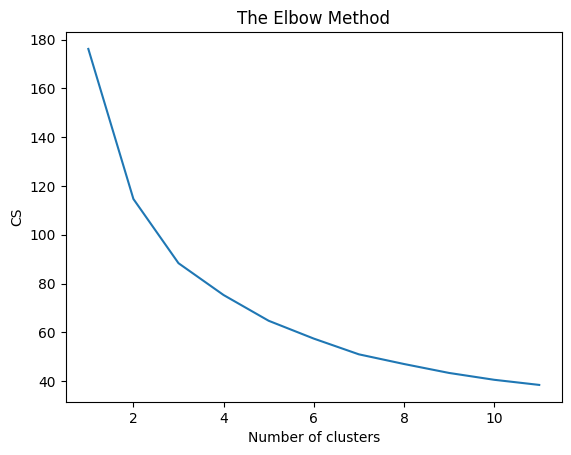

In [52]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 12), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

individual k mean

In [80]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=7, random_state=0)

In [81]:
labels=kmeans.labels_
pd.DataFrame(labels).to_csv('jm_aug_l')
print(labels)

[6 4 6 4 4 4 6 6 4 6 5 6 4 4 6 6 6 6 6 6 6 4 4 4 4 4 5 6 4 4 4 4 6 6 6 6 4
 4 5 4 4 6 6 4 5 4 4 5 4 5 6 4 4 4 6 4 6 6 6 4 4 6 5 5 4 6 6 6 6 6 4 4 6 4
 6 4 4 5 5 4 6 5 5 4 6 4 4 4 4 4 4 4 5 5 5 5 4 4 4 4 4 4 4 1 5 0 1 5 6 6 5
 5 5 4 4 4 4 4 4 4 6 6 6 6 6 6 4 5 5 4 4 4 5 5 5 5 5 5 6 6 4 4 4 4 5 5 4 1
 4 4 5 5 4 4 4 5 5 5 4 5 5 1 5 6 6 4 4 4 4 4 4 5 6 2 4 4 5 1 6 4 5 1 1 2 2
 5 5 2 2 6 6 6 6 6 6 6 5 5 5 4 5 2 5 5 5 5 5 1 2 2 3 1 5 2 2 2 2 1 2 2 5 1
 2 2 3 1 1 1 2 2 3 5 5 5 4 6 4 4 4 2 5 1 2 2 2 5 2 2 5 1 2 2 2 1 1 2 3 2 3
 2 1 2 2 1 2 3 1 1 5 3 3 2 1 1 2 3 1 1 2 5 3 2 1 2 6 2 3 2 1 1 2 1 1 1 1 3
 3 1 2 3 3 3 3 3 5 5 5 5 5 1 0 0 2 4 4 0 5 5 2 1 5 2 1 5 5 2 0 0 5 0 0 0 5
 0 0 0 0 0 0 0 2 1 2 5 1 0 2 5 5 5 4 1 2 4 6 0 1 5 5 0 0 0 0 0 5 4 5 1 5 5
 2 2 5 4 1 1 1 0 2 4 2 1 1 2 5 4 2 5 0 0 1 1 1 4 4 4 4 5 2 2 1 5 5 5 0 5 4
 5 4 0 5 5 0 0 0 0 0 5 2 1 0 0 0 5 5 5 1 4 0 0 0 0 5 0 0 5 0 5 5 5 3 0 0 1
 2 4 4 2 2 2 4 5 5 0 0 3 5 4 4 5 0 0 0 0 5 5 0 0 0 0 0 0 5 5 0 5 0 0 0 0 0
 0 5 5 2 1 0 4 1 1 2 2 0 

In [82]:
Z=kmeans.cluster_centers_
Z

array([[0.11777554, 0.13168724, 0.03341837, 0.24621212, 0.55788889],
       [0.62599387, 0.26143279, 0.45939925, 0.51845296, 0.58760563],
       [0.22633065, 0.45851852, 0.16428571, 0.47208556, 0.4704    ],
       [0.6993383 , 0.7625831 , 0.66195709, 0.53421089, 0.45777778],
       [0.08266129, 0.17587178, 0.05495883, 0.27812178, 0.18081871],
       [0.4658527 , 0.07908141, 0.48622806, 0.22119592, 0.41706294],
       [0.45345817, 0.13140824, 0.517468  , 0.21680413, 0.        ]])

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 717 samples in 0.004s...
[t-SNE] Computed neighbors for 717 samples in 0.099s...
[t-SNE] Computed conditional probabilities for sample 717 / 717
[t-SNE] Mean sigma: 0.189881
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.991241
[t-SNE] KL divergence after 1200 iterations: 0.187013


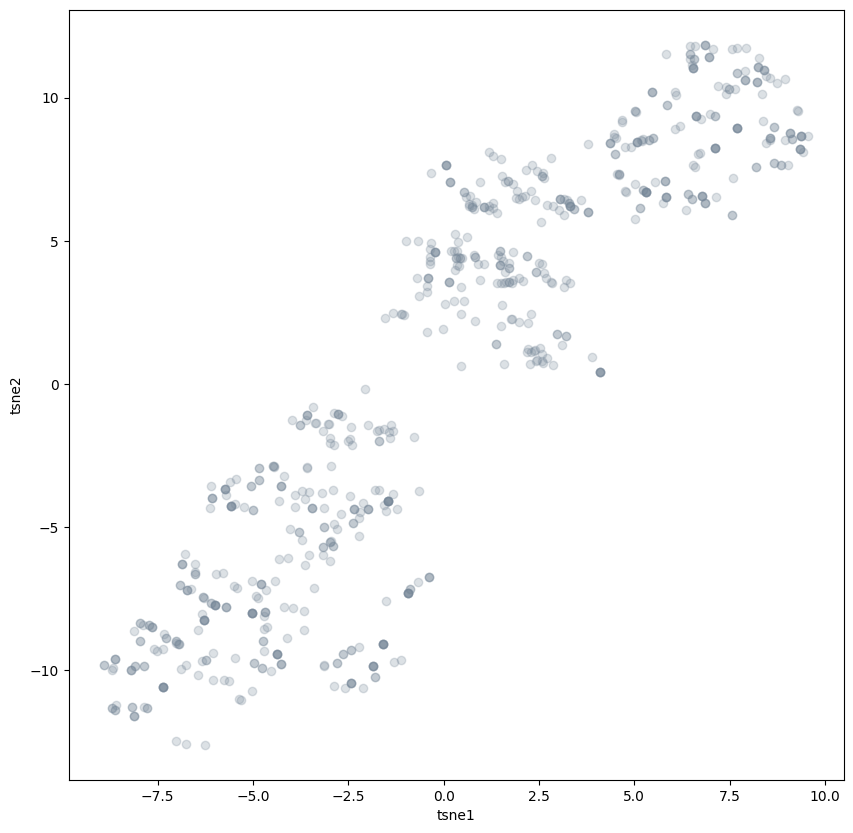

In [83]:

tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

In [84]:
import matplotlib

In [85]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=2500, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])


[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 717 samples in 0.002s...
[t-SNE] Computed neighbors for 717 samples in 0.034s...
[t-SNE] Computed conditional probabilities for sample 717 / 717
[t-SNE] Mean sigma: 0.189881
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.389233
[t-SNE] KL divergence after 1650 iterations: 0.265058


In [86]:
np.unique(labels)


array([0, 1, 2, 3, 4, 5, 6], dtype=int32)

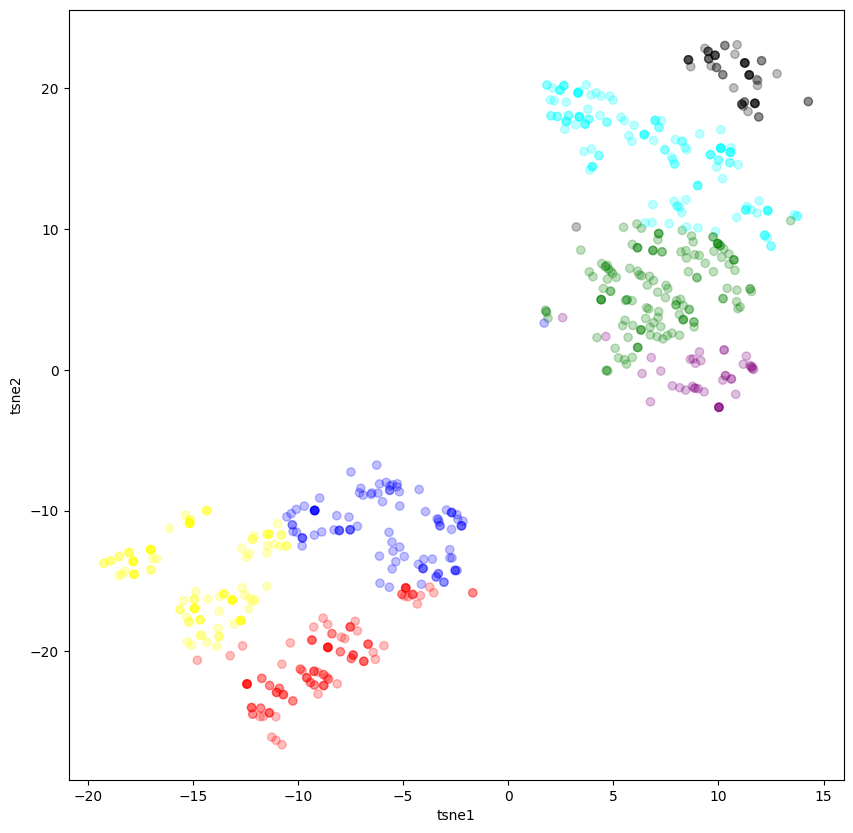

In [89]:
colors = ["red","green","blue","purple","yellow","cyan","black"]
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Reverse Scaling

In [88]:
Z2 = ms.inverse_transform(Z)
pd.DataFrame(Z2).to_csv('cc_jm_aug')
Z2

array([[ 81.20833333,  46.66666667,  30.275     , 101.04166667,
         41.84166667],
       [207.24647887,  57.17605634,  72.02112676, 151.95070423,
         44.07042254],
       [108.13      ,  73.14      ,  43.1       , 143.28      ,
         35.28      ],
       [225.43589744,  97.76923077,  91.87179487, 154.8974359 ,
         34.33333333],
       [ 72.5       ,  50.24561404,  32.38596491, 107.00877193,
         13.56140351],
       [167.53146853,  42.40559441,  74.65034965,  96.36363636,
         31.27972028],
       [164.45762712,  46.6440678 ,  77.71186441,  95.54237288,
          0.        ]])